In [ ]:
# ###################################
# Group ID: 222
# Members: Adrián Gómez Repollés, Kresten Johansen, Misbah Unnisa, Mohammadali Zakeriharandi
# Date: 19/03/2024
# Lecture: 3a Parametric methods
# Dependencies: Numpy, Scipy and Matplotlib.
# Python version: 3.12.2
# Functionality: Jupyter notebook to classify categories using probability calculations
# ###################################

## Day 2 - Exercise

### Exercises for Lecture 4 Dimensionality reduction: download full dataset "mnist_all.mat" (or its ASCII version "mnist_all_ASCII.zip") under the folder "Data and code" above, which is a Matlab format of THE MNIST DATABASE of handwritten digits by Yann LeCun, and Corinna Cortes: A training set of 60,000 examples, and a test set of 10,000 examples; each having a size of 28 x 28 = 784 (concatenating the pixels). Read the linked webpage for more details. 

In [159]:
## Imports
import numpy as np
import scipy.io as sio
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as norm

In [4]:
import os
os.chdir("..")

In [5]:
## Load data
mnist = sio.loadmat('Data/mnist_all.mat')

In [6]:
## Split data and normalize

# Train
train5 = mnist['train5'].astype(np.float32) / 255.
train6 = mnist['train6'].astype(np.float32) / 255.
train8 = mnist['train8'].astype(np.float32) / 255.

# Test
test5 = mnist['test5'].astype(np.float32) / 255.
test6 = mnist['test6'].astype(np.float32) / 255.
test8 = mnist['test8'].astype(np.float32) / 255.

In [7]:
del mnist

**Functions**

In [115]:
def PCA_estimation(data, n_components=2):
    """
    Function for PCA estimation

    Returns selected eigenvalues and eigenvectors, and the mean of your data
    """
    
    # Step 1: compute covariance matrix from data
    cov = np.cov(data.T)

    # Step 2: compute eigenvalues and eigenvectors from the covariance matrix
    # Hint: use eig function in your library of choice
    eigvals, eigvecs = linalg.eigh(cov)

    # Step 3: Sort the list of eigenvalues in descending order
    # Hint: use argsort function in numpy, reverse it
    # Select top `n_component` indices
    sorted_idxs = np.argsort(eigvals)[::-1]
    sorted_idxs = sorted_idxs[:n_components]

    # Step 4: Take the first "n_components" of your eigens using the sorted indexes
    lambdas = eigvals[sorted_idxs]
    vectors = eigvecs[:,:n_components]
    
    # Step 5: Compute the mean of the data
    mean = np.mean(data)

    return lambdas, vectors, mean

In [149]:
def apply_PCA(data, lambdas, vectors, mean):
    """
    Function to apply PCA to data
    """
    # Step 1: Center the input data given the mean (hint: subtract)
    centered_data = data - mean

    # Step 2: project the centered data onto the selected eigenvectors
    # Hint: dot product with the input vectors
    reduced_data = centered_data @ vectors
    return reduced_data

In [170]:
def reconstruct_data(data, lambdas, vectors, mean):
    """
    Function to reconstruct data from PCA
    """
    # Step 1: project the data back to the original space
    # Hint: dot product with the transpose of the vectors
    projected_data = apply_PCA(data, lambdas, vectors, mean)

    # Step 2: add the mean back to the projected data
    reconstructed_data = (vectors @ pca.T) + mean
    return reconstructed_data

### (a) from the 10-class database, choose three classes (5, 6 and 8) and then reduce dimension to 2


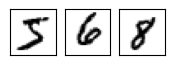

In [80]:
# Visualize dataset
fig, ax = plt.subplots(1, 3, figsize=(2,2))
ax[0].imshow(np.reshape(train5[0], (28,28)), cmap="binary")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(np.reshape(train6[0], (28,28)), cmap="binary")
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].imshow(np.reshape(train8[0], (28,28)), cmap="binary")
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.show()

In [9]:
# Merge data
train = np.concatenate([train5, train6, train8], axis=0)
test = np.concatenate([test5, test6, test8], axis=0)

In [171]:
# PCA
lambdas, vectors, mean = PCA_estimation(train, n_components=2)
pca = apply_PCA(train, lambdas, vectors, mean)
res_pca = reconstruct_data(train, lambdas, vectors, mean)

[]

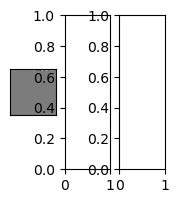

In [177]:
fig, ax = plt.subplots(1, 3, figsize=(2,2))
ax[0].imshow(np.reshape(res_pca[:,0], (28,28)), cmap="binary")
ax[0].set_xticks([])
ax[0].set_yticks([])

### (b) perform 3-class classification based on the generated 2-dimensional data.

**Use Gaussian Estimation to perform multiclass classification from yesterday's exercise. 
You can use any library (sklearn)/classifier you want)**

In [163]:
# Functions
def PCA(data, ncomp):
    lambdas, vectors, mean = PCA_estimation(data, n_components=ncomp)
    pca = apply_PCA(data, lambdas, vectors, mean)
    res_pca = reconstruct_data(data, lambdas, vectors, mean)
    return([pca, res_pca])

In [156]:
## Transform data to PCA (2 dimensions)

# Reduce data individually
rd_train5 = PCA(train5, 2)
rd_train6 = PCA(train6, 2)
rd_train8 = PCA(train8, 2)

In [157]:
# Compute prior distributions
pp5 = train5.shape[0] / train.shape[0]
pp6 = train6.shape[0] / train.shape[0]
pp8 = train8.shape[0] / train.shape[0]

In [160]:
## Compute parameters

# Means
mean5 = np.mean(train5, axis=0)
mean6 = np.mean(train6, axis=0)
mean8 = np.mean(train8, axis=0)

# Covariances
cov5 = np.cov(train5.T)
cov6 = np.cov(train6.T)
cov8 = np.cov(train8.T)

# Multivariate Gaussian
l5 = norm(mean = mean5, cov = cov5)
l6 = norm(mean = mean6, cov = cov6)
l8 = norm(mean = mean8, cov = cov8)

LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

In [ ]:
# Posterior probabilities
postprob = np.array([pp5 * l5.pdf(test), pp6 * l6.pdf(test), pp8 * l8.pdf(test)]).T

In [ ]:
# Classification
cls = [1 if i[0] > i[1] else 2 for i in postprob]
total = len(test)

In [ ]:
acc = np.sum([1 for i,j in zip(cls, test) if i == j]) / len(test) * 100
print(f"Accurracy is equal to {np.round(acc,2)}%")

### [Optional] Exercises for Lecture 5 Clustering:  This assignment is based on the previously generated 2-dimensional data of the three classes (5, 6 and 8) from the MNIST database of handwritten digits. First, mix the 2-dimensional data (training data only) by removing the labels and then use one Gaussian mixture model to model them. Secondly, compare the Gaussian mixture model with the Gaussian models trained in the previous assignment, in terms of mean and variance values as well as through visualisation.